In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_set = pd.read_csv('https://raw.githubusercontent.com/siddhantbhattarai/Machine_Learning_Bootcamp_2024/refs/heads/main/Datasets/diabetes_prediction_dataset.csv')
data_set.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
data_set.shape

(100000, 9)

In [4]:
data_set.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
print("The no. of duplicated rows:", data_set.duplicated().sum())

The no. of duplicated rows: 3854


In [6]:
print("The Null values per column:\n", data_set.isnull().sum())

The Null values per column:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [7]:
data_set.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [9]:
# Rename the diabetes column to Outcome
data_set.rename(columns={'diabetes': 'Outcome'}, inplace=True)

# Verify the change
print("Updated columns:", data_set.columns)

Updated columns: Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'Outcome'],
      dtype='object')


In [10]:
# Check unique values in the diabetes (Outcome) column
unique_values = data_set['Outcome'].unique()
print("Unique values in the Outcome column:", unique_values)

Unique values in the Outcome column: [0 1]


In [12]:
# Count the unique values in the Outcome column
outcome_counts = data_set['Outcome'].value_counts()
print("Unique value counts in the Outcome column:\n", outcome_counts)

Unique value counts in the Outcome column:
 Outcome
0    91500
1     8500
Name: count, dtype: int64


In [13]:
data_set = data_set.drop_duplicates()

In [14]:
print("The no. of duplicated rows after cleaning:", data_set.duplicated().sum())

The no. of duplicated rows after cleaning: 0


In [15]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   Outcome              96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


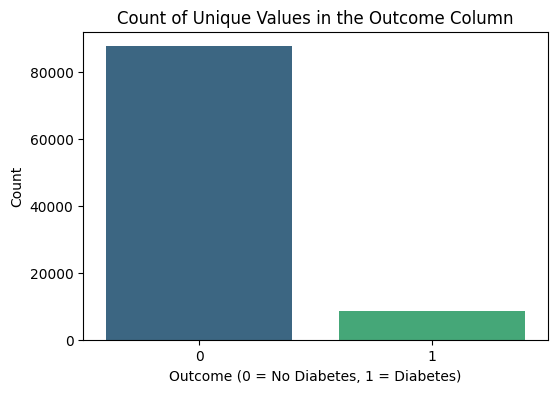

In [21]:
# Updated count plot to avoid FutureWarning
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=data_set, hue='Outcome', dodge=False, palette='viridis', legend=False)
plt.title("Count of Unique Values in the Outcome Column")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")
plt.show()
